In [135]:
# loeme sisse vajalikud paketid
# numpy & pandas -> data manipulation
# yfinance aitab finants tickers sisse võtta
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


/tmp/ipykernel_1635869/2281963029.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [136]:
print(matplotlib.__version__)

3.7.1


In [77]:
#loeme sisse S&P500 indexsi SPY 
df = yf.download("SPY", start="2003-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [78]:
#saab ka lugeda sisse mitmeid tickereid korraga
#microsoft, coca-cola, apple, google, nike, visa, kellogs, 20 aasta võlakiri ETF,  
#Seekord võtame ainult SPY

symbols = "MSFT", "KO", "AAPL", "GOOG", "NKE", "V", "K", "TLT", 
symbols = "SPY" 

In [79]:
#df -> dataframe
df = yf.download(symbols, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed


In [80]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,120.399689,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,120.127663,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,120.655228,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,120.325493,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,119.979256,121265100
...,...,...,...,...,...,...
2022-12-23,379.649994,383.059998,378.029999,382.910004,380.042480,59857300
2022-12-27,382.790009,383.149994,379.649994,381.399994,378.543793,51638200
2022-12-28,381.329987,383.390015,376.420013,376.660004,373.839264,70911500


In [81]:
close = df["Close"]

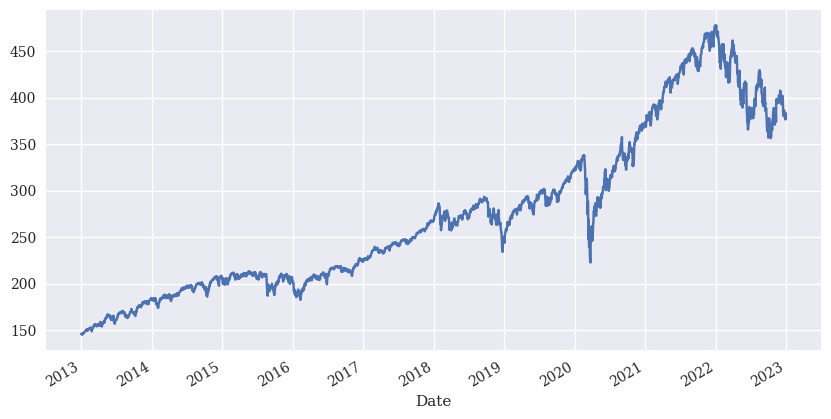

In [82]:
close.plot(figsize=(10,5), subplots=True);

In [84]:
close.describe().round(2) 

count    2518.00
mean      273.95
std        86.89
min       145.55
25%       205.14
50%       258.24
75%       326.81
max       477.71
Name: Close, dtype: float64

In [85]:
close.mean()

273.9549841301322

In [86]:
close.aggregate([min, np.mean, np.std, np.median,max]).round(2)

min       145.55
mean      273.95
std        86.89
median    258.24
max       477.71
Name: Close, dtype: float64

In [87]:
close.pct_change().round(3).head()

Date
2013-01-02      NaN
2013-01-03   -0.002
2013-01-04    0.004
2013-01-07   -0.003
2013-01-08   -0.003
Name: Close, dtype: float64

In [127]:
close

Date
2013-01-02    146.059998
2013-01-03    145.729996
2013-01-04    146.369995
2013-01-07    145.970001
2013-01-08    145.550003
                 ...    
2022-12-23    382.910004
2022-12-27    381.399994
2022-12-28    376.660004
2022-12-29    383.440002
2022-12-30    382.429993
Name: Close, Length: 2518, dtype: float64

In [131]:

close.pct_change().mean().plot(kind='bar', figsize=(10, 6));

AttributeError: 'numpy.float64' object has no attribute 'plot'